In [282]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
np.random.seed(seed=0)

In [283]:
data = pd.read_csv('C:/Users/DELL/P1/data/Covid19.csv', nrows = 10000, encoding='cp949')
print("전체 뉴스 개수 :",(len(data)))

전체 뉴스 개수 : 10000


In [284]:
data = data[['본문', '특성추출']]
data.sample(10)

,본문,특성추출
9394,카카오뱅크(대표 윤호영)는 올해 1분기에 이어 2분기에도 순이익 기조를 이어갔다. ...,"상반기,카카오뱅크,순이익,수수료,이용자수,이용자,순손실,2배,커넥트,자기자본비율"
898,길정섭 농협 충남지역본부장은 지난달 31일 기습적인 집중호우로 비닐하우스 및 농경지...,"길정섭,집중호우,본부장,비닐하우스,농산물,농업인,농업인들,진흙탕,자연재해,농협,강수..."
2398,[앵커] ..서울 강남의 커피전문점에서 또 깜깜이 감염사례가 발생해 모두 9명의 코...,"안정세,휴가철,1명,코로나19,2주,집단감염,휴가지,할리스커피,강남,신현준,분수령,..."
5906,코스피 지수가 지난 3월 코로나 팬데믹(세계적 대유행)으로 폭락한 이후 4개월 반만...,"코스피,미국,코로나,상승세,외국인,순매도,4개월,최고치,코스닥,서상영,키움증권,대형..."
2343,[아시아경제 허미담 기자] 2일 서울 양천구에서 코로나19 72번째 확진자가 발생했...,"자가격리,확진자,72번,코로나19,송파구,서울,양천구,음성판정,상태,검사,판정,확진..."
8225,[머니투데이 최민경 기자] 코로나19(COVID-19)의 여파로 조선 업황이 부진한...,"조선,조선해양,stx,선주사,stx조선해양,코로나19,노사정,주파수,자구안,사측,경..."
5506,코로나19에 따른 외식 자제 트렌드가 장기화하면서 집밥 메뉴가 고급화하고 있다......,"도원,갤러리아백화점,코로나19,갤러리아,집밥,원재료,가정간편식,식감,신제품,이마트,..."
6451,대전하나시티즌의 첫 유관중 경기 예매가 4일부터 시작됐다. ..대전은 오는 8일 대...,"유관중,관중석,대전월드컵경기장,확진자,경기장,코로나19,경남,1인,원정석,2047석..."
2670,계명대는 하계방학을 맞아 다양한 비교과프로그램을 운영하며 학생들로부터 호응을 얻고 ...,"계명대,외국어,공모전,학생들,자격증,온라인,4차,융합교육,사업부,네트워크,하계방학,..."
3497,일자리창출…정상수·백영옥 ..연구개발…정홍걸 ..창업성공…나희준 ..건설혁신…원홍상...,"치료제,파마리서치프로덕트,의약품,시상식,코로나19,강원경제,화장품,진단키트,설악에너..."


In [285]:
print('본문 열에서 중복을 배제한 유일한 샘플의 수 :', data['본문'].nunique())
print('특성추출 열에서 중복을 배제한 유일한 샘플의 수 :', data['특성추출'].nunique())

본문 열에서 중복을 배제한 유일한 샘플의 수 : 9820
특성추출 열에서 중복을 배제한 유일한 샘플의 수 : 9945


In [286]:
data.drop_duplicates(subset=['본문'], inplace=True)
print("샘플 수 :", len(data))

샘플 수 : 9820


In [287]:
print(data.isnull().sum())

본문      0
특성추출    0
dtype: int64


In [288]:
data.dropna(axis=0, inplace=True)
print('전체 샘플 수 :',(len(data)))

전체 샘플 수 : 9820


본문의 최소 길이 : 1
본문의 최대 길이 : 61
본문의 평균 길이 : 42.20794297352342
키워드의 최소 길이 : 1
키워드의 최대 길이 : 6
키워드의 평균 길이 : 1.0046843177189408


C:\Users\DELL\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DELL\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DELL\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DELL\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DELL\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DELL\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current

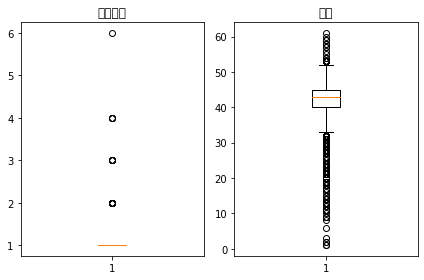

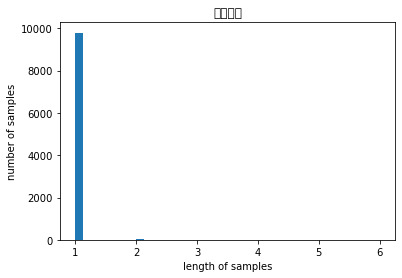

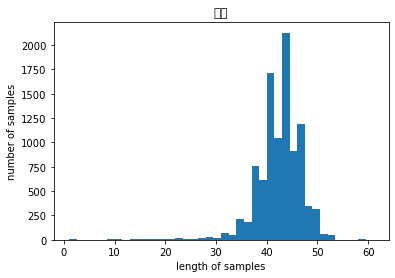

In [289]:
# 길이 분포 출력
text_len = [len(s.split()) for s in data['본문']]
keyword_len = [len(s.split()) for s in data['특성추출']]

print('본문의 최소 길이 : {}'.format(np.min(text_len)))
print('본문의 최대 길이 : {}'.format(np.max(text_len)))
print('본문의 평균 길이 : {}'.format(np.mean(text_len)))
print('키워드의 최소 길이 : {}'.format(np.min(keyword_len)))
print('키워드의 최대 길이 : {}'.format(np.max(keyword_len)))
print('키워드의 평균 길이 : {}'.format(np.mean(keyword_len)))

plt.subplot(1,2,1)
plt.boxplot(keyword_len)
plt.title('특성추출')
plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('본문')
plt.tight_layout()
plt.show()

plt.title('특성추출')
plt.hist(keyword_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('본문')
plt.hist(text_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [290]:
text_max_len = 50
keyword_max_len = 8

In [291]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [292]:
below_threshold_len(text_max_len, data['본문'])

전체 샘플 중 길이가 50 이하인 샘플의 비율: 0.9881873727087577


In [293]:
below_threshold_len(keyword_max_len, data['특성추출'])

전체 샘플 중 길이가 8 이하인 샘플의 비율: 1.0


In [294]:
data = data[data['본문'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['특성추출'].apply(lambda x: len(x.split()) <= keyword_max_len)]
print('전체 샘플 수 :',(len(data)))

전체 샘플 수 : 9704


In [295]:
data.head()

,본문,특성추출
0,의왕시는 코로나 19 장기화로 진로체험 및 문화 활동이 어려운 청소년들을 위해 진로...,"의왕시,온라인,실시간,의왕,가요제,엔터테이너,dream,오프라인,김상돈,유튜브,트롯..."
1,코로나19 가짜뉴스 대책단(백종덕ㆍ최정민ㆍ서성민 변호사 공동단장)이 지난 29일 이...,"이재명,가짜뉴스,악의적,공동단장,백종덕,허위사실,코로나19,90건,온라인,살해설,조..."
2,"지금까지와는 전혀 다른 언택트 시대가 다가오면서, 마케팅 업계에도 변화의 바람이 불...","오프라인,모츠,한국,온라인,런칭,전문가,언택트,캐롯닷밀,뉴딜,엘튼,조슈아"
3,[앵커] ..프로야구에 이어 프로축구도 코로나 19 사태 뒤 처음으로 관중 입장이 ...,"팬들,경기장,광주도,선수들,역전승,최용수,전북도,양시창,전후좌우,2칸,엄원,모라이스..."
4,[앵커] ..전세계적으로 재확산 중인 코로나19가 진정될 조짐을 안 보이는 가운데 ...,"미국,코로나19,제약사,사노피,유럽연합,행정부,유럽,상용화,5억,입도선매,사람들,임..."


In [296]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['특성추출'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['특성추출'].apply(lambda x : x + ' eostoken')
data.head()

,본문,특성추출,decoder_input,decoder_target
0,의왕시는 코로나 19 장기화로 진로체험 및 문화 활동이 어려운 청소년들을 위해 진로...,"의왕시,온라인,실시간,의왕,가요제,엔터테이너,dream,오프라인,김상돈,유튜브,트롯...","sostoken 의왕시,온라인,실시간,의왕,가요제,엔터테이너,dream,오프라인,김...","의왕시,온라인,실시간,의왕,가요제,엔터테이너,dream,오프라인,김상돈,유튜브,트롯..."
1,코로나19 가짜뉴스 대책단(백종덕ㆍ최정민ㆍ서성민 변호사 공동단장)이 지난 29일 이...,"이재명,가짜뉴스,악의적,공동단장,백종덕,허위사실,코로나19,90건,온라인,살해설,조...","sostoken 이재명,가짜뉴스,악의적,공동단장,백종덕,허위사실,코로나19,90건,...","이재명,가짜뉴스,악의적,공동단장,백종덕,허위사실,코로나19,90건,온라인,살해설,조..."
2,"지금까지와는 전혀 다른 언택트 시대가 다가오면서, 마케팅 업계에도 변화의 바람이 불...","오프라인,모츠,한국,온라인,런칭,전문가,언택트,캐롯닷밀,뉴딜,엘튼,조슈아","sostoken 오프라인,모츠,한국,온라인,런칭,전문가,언택트,캐롯닷밀,뉴딜,엘튼,조슈아","오프라인,모츠,한국,온라인,런칭,전문가,언택트,캐롯닷밀,뉴딜,엘튼,조슈아 eostoken"
3,[앵커] ..프로야구에 이어 프로축구도 코로나 19 사태 뒤 처음으로 관중 입장이 ...,"팬들,경기장,광주도,선수들,역전승,최용수,전북도,양시창,전후좌우,2칸,엄원,모라이스...","sostoken 팬들,경기장,광주도,선수들,역전승,최용수,전북도,양시창,전후좌우,2...","팬들,경기장,광주도,선수들,역전승,최용수,전북도,양시창,전후좌우,2칸,엄원,모라이스..."
4,[앵커] ..전세계적으로 재확산 중인 코로나19가 진정될 조짐을 안 보이는 가운데 ...,"미국,코로나19,제약사,사노피,유럽연합,행정부,유럽,상용화,5억,입도선매,사람들,임...","sostoken 미국,코로나19,제약사,사노피,유럽연합,행정부,유럽,상용화,5억,입...","미국,코로나19,제약사,사노피,유럽연합,행정부,유럽,상용화,5억,입도선매,사람들,임..."


In [297]:
encoder_input = np.array(data['본문'])
decoder_input = np.array(data['decoder_input'])
decoder_target = np.array(data['decoder_target'])

In [298]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[ 516 4769 6635 ... 4892 6264 4574]


In [299]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [300]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :',n_of_val)

테스트 데이터의 수 : 1940


In [301]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

훈련 데이터의 개수 : 7764
훈련 레이블의 개수 : 7764
테스트 데이터의 개수 : 1940
테스트 레이블의 개수 : 1940


In [302]:
src_tokenizer = Tokenizer()
src_tokenizer.fit_on_texts(encoder_input_train)

In [303]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수 : %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 : %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율 :", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율 :", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 80411
등장 빈도가 6번 이하인 희귀 단어의 수 : 73636
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 : 6775
단어 집합에서 희귀 단어의 비율 : 91.57453582221338
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : 37.87783584092452


In [304]:
src_vocab = 8000
src_tokenizer = Tokenizer(num_words = src_vocab) 
src_tokenizer.fit_on_texts(encoder_input_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

In [305]:
print(encoder_input_train[:3])

[[4465, 107, 1369, 29, 5768, 2384, 3010, 5, 750, 1585, 118, 5034, 340, 239, 814, 714, 40, 5769, 6776, 212, 6777, 372, 3979, 5035, 5770, 122, 2774, 1316, 1586, 1587, 877, 5771, 1317, 2107, 5772, 1369, 5035, 666, 122, 5036], [5037, 85, 372, 519, 456, 2559, 4466, 1855, 400, 250, 95, 2235, 9, 13, 11, 1, 84, 815, 4467, 6778, 3], [189, 3980, 1, 628, 6779, 4468, 135, 20, 232, 3598, 32, 1216, 180, 1443, 3981, 19, 96, 1444, 284, 1756, 10, 202, 4469, 3982, 66, 1318, 488, 3599, 4468, 520, 22, 4470, 290, 34, 3276, 2560, 4471, 3277, 180]]


In [306]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [307]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수 : %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 : %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율 :", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율 :", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 41822
등장 빈도가 5번 이하인 희귀 단어의 수 : 36942
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 : 4880
단어 집합에서 희귀 단어의 비율 : 88.33150016737602
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : 33.119912701682495


In [308]:
tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words = tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

In [309]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

In [310]:
print(decoder_input_train[:5])

[[2, 6, 541, 1, 15, 42, 185, 1266, 190], [2, 580, 474, 6, 1, 30, 296, 920, 1461, 24, 357, 605], [2, 581, 76, 1, 394, 1358, 39, 1267, 1268, 542, 24, 1359, 364, 1575, 161, 6], [2, 6, 1020, 1, 506, 1269, 541, 30, 707, 324, 15, 5, 920], [2, 13, 6, 1270, 5, 1, 8]]


In [311]:
print(decoder_target_train[:5])

[[6, 541, 1, 15, 42, 185, 1266, 190, 3], [580, 474, 6, 1, 30, 296, 920, 1461, 24, 357, 605, 3], [581, 76, 1, 394, 1358, 39, 1267, 1268, 542, 24, 1359, 364, 1575, 161, 6, 3], [6, 1020, 1, 506, 1269, 541, 30, 707, 324, 15, 5, 920, 3], [13, 6, 1270, 5, 1, 8, 3]]


In [312]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

In [313]:
print('삭제할 훈련 데이터의 개수 :',len(drop_train))
print('삭제할 테스트 데이터의 개수 :',len(drop_test))

삭제할 훈련 데이터의 개수 : 5
삭제할 테스트 데이터의 개수 : 1


In [314]:
encoder_input_train = np.delete(encoder_input_train, drop_train, axis=0)
decoder_input_train = np.delete(decoder_input_train, drop_train, axis=0)
decoder_target_train = np.delete(decoder_target_train, drop_train, axis=0)

encoder_input_test = np.delete(encoder_input_test, drop_test, axis=0)
decoder_input_test = np.delete(decoder_input_test, drop_test, axis=0)
decoder_target_test = np.delete(decoder_target_test, drop_test, axis=0)

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

훈련 데이터의 개수 : 7759
훈련 레이블의 개수 : 7759
테스트 데이터의 개수 : 1939
테스트 레이블의 개수 : 1939


In [315]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen = text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen = text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen = keyword_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen = keyword_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen = keyword_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen = keyword_max_len, padding='post')

In [316]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [317]:
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [318]:
# 디코더
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, dropout = 0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

In [319]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation = 'softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 50, 128)      1024000     input_10[0][0]                   
__________________________________________________________________________________________________
lstm_12 (LSTM)                  [(None, 50, 256), (N 394240      embedding_6[0][0]                
__________________________________________________________________________________________________
input_11 (InputLayer)           [(None, None)]       0                                            
______________________________________________________________________________________

In [320]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/thushv89/attention_keras/master/src/layers/attention.py", filename="attention.py")
from attention import AttentionLayer

In [321]:
# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis = -1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "functional_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 50, 128)      1024000     input_10[0][0]                   
__________________________________________________________________________________________________
lstm_12 (LSTM)                  [(None, 50, 256), (N 394240      embedding_6[0][0]                
__________________________________________________________________________________________________
input_11 (InputLayer)           [(None, None)]       0                                            
______________________________________________________________________________________

In [322]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [323]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 2)
history = model.fit(x = [encoder_input_train, decoder_input_train], y = decoder_target_train, \
          validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size = 256, callbacks=[es], epochs = 50)

Epoch 1/50
31/31 [==============================] - 605s 20s/step - loss: 6.3099 - val_loss: 5.9834
Epoch 2/50
31/31 [==============================] - 352s 11s/step - loss: 5.9564 - val_loss: 5.8146
Epoch 3/50
31/31 [==============================] - 223s 7s/step - loss: 5.7740 - val_loss: 5.7092
Epoch 4/50
31/31 [==============================] - 221s 7s/step - loss: 5.6639 - val_loss: 5.6446
Epoch 5/50
31/31 [==============================] - 222s 7s/step - loss: 5.5540 - val_loss: 5.5262
Epoch 6/50
31/31 [==============================] - 223s 7s/step - loss: 5.4270 - val_loss: 5.4431
Epoch 7/50
31/31 [==============================] - 223s 7s/step - loss: 5.3121 - val_loss: 5.3658
Epoch 8/50
31/31 [==============================] - 317s 10s/step - loss: 5.2198 - val_loss: 5.4141
Epoch 9/50
31/31 [==============================] - 226s 7s/step - loss: 5.1398 - val_loss: 5.3023
Epoch 10/50
31/31 [==============================] - 227s 7s/step - loss: 5.0758 - val_loss: 5.3185
Epoch 

KeyboardInterrupt: 

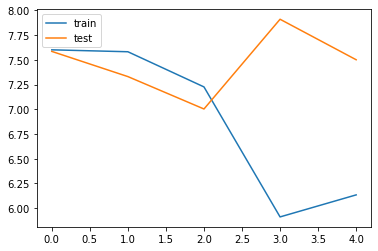

In [324]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [325]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 키워드 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 키워드 단어 집합에서 정수 -> 단어를 얻음

In [326]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

In [327]:
# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)
# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [328]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [329]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if(sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (keyword_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

In [330]:
# 본문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if(i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 키워드의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2keyword(input_seq):
    temp=''
    for i in input_seq:
        if((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [331]:
for i in range(1, 15):
    print("본문 :",seq2text(encoder_input_test[i]))
    print("실제 키워드 :",seq2keyword(decoder_input_test[i]))
    print("예측 키워드 :",decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

본문 : 머니투데이 이민하 기자 인천공항 뉴스1 기자 이라크 건설 현장 파견 근로자들이 31일 오전 인천국제공항을 통해 입국해 오르고 있다 이날 신종 코로나바이러스 감염증 코로나19 이 중인 이라크 건설 현장에서 우리 근로자 전세기편으로 2020 7 31 3 
실제 키워드 : 우리나라 박능후 인천공항 감염증 2차 중대본 임시생활시설 1차 
예측 키워드 :  코로나19 코로나19 코로나바이러스 코로나바이러스 코로나바이러스


본문 : 도널드 트럼프 미국 대통령이 미국의 코로나19 중 한국의 사망자 의문을 트럼프 대통령은 3일 현지시간 밤 방송된 다큐멘터리 뉴스 온 on 인터뷰에서 기자와 벌였다 지난달 28일 진행된 이 인터뷰에서 트럼프 대통령은 
실제 키워드 : 미국 사망자 확진자 독일 도널드 전문가 팬데믹 만큼 
예측 키워드 :  코로나19 코로나19 코로나19 코로나바이러스


본문 : 2일 최근 코로나19 극복을 위한 밝혔다 지난달 30일 진행된 전달식에는 아름다운 회장 등 관계자들이 참석했다 코로나19로 어려워진 전 
실제 키워드 : 모금회 인도네시아 강원도 관계자 전달식 소외계층 관계자들 사각지대 
예측 키워드 :  코로나19 코로나19 코로나19


본문 : 지도 데이터 개발 스타트업 코로나 19 팬데믹 대유행 으로 세계 수출 위주의 우리 한국 되고 있다 하지만 그 오히려 기업들이 있다 바로 기술력을 바탕으로 한 이 같은 
실제 키워드 : ai 삼성전자 현대 고객사 스타트업 
예측 키워드 :  코로나19 코로나19


본문 : 정세균 국무총리는 3일 이번 장마의 인명 및 두고 철저히 대비해 주기 주문했다 정 총리는 이날 정부서울청사에서 주재한 집중호우 넘게 계속되는 긴 장마로 전국 곳곳에 피해가 이어지고 있다며 
실제 키워드 : 지역 호우 국민 총리 장마 집중 대응 이날 
예측 키워드 :  코로나19 코로나19 코로나19 코로나19


본문 : 대전 지역 신종 코로나바이러스 감염증 코로나19 사태로 등록금 반환 기존 혜택 축소해 일고 있다 3일 따르면